## Das Bootstrapping-Verfahren

In [1]:
import pandas as pd
x = pd.Series([21, 13,  8, 14, 10, 12,  5])
x.mean()

11.857142857142858

In [2]:
x.sample(n=len(x), replace=True) 
# simulierte Bootstrapping-Stichprobe

3    14
1    13
6     5
5    12
1    13
0    21
2     8
dtype: int64

In [3]:
x_means = []
S=10000
for i in range(S):
    x_mean = x.sample(n=len(x), replace=True).mean()
    x_means.append(x_mean)

# Für möglichst exakte Ergebenisse mind. 10000x (hier) durchgeführt

/tmp/ipykernel_5039/1544532363.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_means, kde=False, bins=35)


<Axes: >

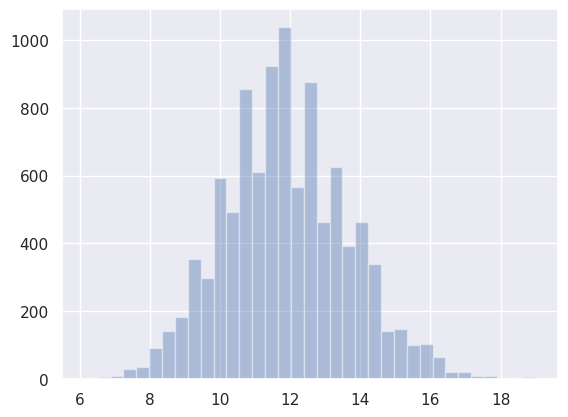

In [4]:
#matplotlib inline
import seaborn as sns
sns.set_theme()
sns.distplot(x_means, kde=False, bins=35)

In [5]:
x_means = pd.Series(x_means)
x_means.between(9,11).mean()

# Wie viele Mittelwerte liegen zwischen 9 und 11?

0.2986

### 4.1 Bootstrapping-Verfahren

- Lies Sie den Datensatz ein.
- Um eine homogene Stichprobe zu erhalten filtere nach Bibliothekskunden die sich im Jahr 2010 registriert haben und auch noch im Jahr 2016 (als der Datensatz erstellt wurde) aktiv waren. [Achtung: Die Spalte 'Circulation Active Year' wird standardmäßig als Text eingelesen]
- Betrachte die Variable 'Total Renewals'. Wie viele Verlängerungen wurden im Mittel durchgeführt?
- Erstelle, wie oben beschrieben, eine Stichprobenverteilung für den Mittelwert.
- Wie viel Prozent der Stichproben-Mittelwerte liegen zwischen 89 und 92 Verlängerungen?
- Wie groß musst Du das Intervall wählen, so dass 90% aller Bootstrapping-Mittelwerte darin liegen? [Tipp: Nutze die Funktion pandas.Series.quantile]

In [6]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv", na_values='None')

/tmp/ipykernel_5039/3739991540.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Library_Usage.csv", na_values='None')


In [7]:
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436285,0,Adult,2,6,35 to 44 years,yjj,Bookmobile,Oct,2022.0,z,Email,True,2020,NaN
436286,2,Teen,3,0,10 to 19 years,yjj,Bookmobile,Nov,2015.0,z,Email,True,2011,NaN
436287,0,Adult,6,0,60 to 64 years,ylw,Bookmobile,Mar,2022.0,z,Email,True,2022,NaN
436288,15,Teacher Card,4,0,35 to 44 years,ylw,Bookmobile,Sep,2020.0,z,Email,True,2019,NaN


In [8]:
df_SP = df[(df['Year Patron Registered'] ==2010) & (df['Circulation Active Year']  == 2016)]

In [9]:
df_SP

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
37223,2,Teen,3,2,10 to 19 years,b4,Bernal,Mar,2016.0,z,Email,True,2010,False
57957,0,Adult,109,50,45 to 54 years,m8,Mission Bay,Sep,2016.0,z,Email,True,2010,False
64977,2,Teen,146,11,10 to 19 years,p7,Potrero,Aug,2016.0,z,Email,True,2010,False
65696,2,Teen,20,0,10 to 19 years,p7,Potrero,Feb,2016.0,z,Email,True,2010,False
72677,0,Adult,25,0,20 to 24 years,c2,Chinatown,Jul,2016.0,z,Email,True,2010,False
85525,2,Teen,71,27,10 to 19 years,r3,Richmond,Apr,2016.0,z,Email,True,2010,False
102562,2,Teen,17,3,10 to 19 years,b4,Bernal,Jan,2016.0,z,Email,True,2010,False
103608,0,Adult,143,2,10 to 19 years,b4,Bernal,Nov,2016.0,NaN,NaN,False,2010,False
104110,0,Adult,232,4,20 to 24 years,e7,Eureka Valley,Mar,2016.0,z,Email,True,2010,False
105506,2,Teen,35,5,10 to 19 years,e9,Excelsior,Dec,2016.0,z,Email,True,2010,False


In [10]:
df['Total Renewals'].mean()

78.317545669165

In [11]:
bt_means = []
alpha = 0.10
S=1000
for i in range(S):
    stat = df['Total Renewals'].sample (len(df), replace=True).mean()
    bt_means.append(stat)

In [15]:
pd.Series(bt_means).between(89,92).mean()

0.0

In [16]:
pd.Series(bt_means).quantile((alpha/2,1-alpha/2))

0.025    77.430449
0.975    79.191589
dtype: float64

In [17]:
df['Total Checkouts'].mean()

160.29484287973597

In [20]:
bt_means_2 = []
alpha = 0.10
S=1000
for i in range(S):
    stat = df['Total Checkouts'].sample (len(df), replace=True).mean()
    bt_means_2.append(stat)

In [21]:
pd.Series(bt_means_2).between(89,92).mean()

0.0

In [22]:
pd.Series(bt_means_2).quantile((alpha/2,1-alpha/2))

0.05    158.841921
0.95    161.666131
dtype: float64

## Konfidenzintervalle und Signifikanz

In [12]:
x_means = pd.Series(x_means)
alpha = 0.10
x_means.quantile((alpha/2,1-alpha/2))

0.05     9.142857
0.95    14.857143
dtype: float64

### 4.2 Signifikanzniveau

In [13]:
alpha = 0.90
x_means.quantile((alpha/2,1-alpha/2))

0.45    11.571429
0.55    12.000000
dtype: float64

## Mittelwertvergleiche

In [14]:
import pandas as pd

alpha = 0.05
S=10000

x = pd.Series([3, 3, 5, 8, 7, 3, 2, 5, 8, 1])
y = pd.Series([3, 10, 9, 8, 2, 3, 6, 7, 11, 6])

print((x.mean(), y.mean()))

dxy = []
for i in range(S):
    x_mean = x.sample(n=len(x), replace=True).mean()
    y_mean = y.sample(n=len(y), replace=True).mean()
    dxy.append(x_mean - y_mean )

pd.Series(dxy).quantile((alpha/2, 1-alpha/2))

(4.5, 6.5)


0.025   -4.2
0.975    0.3
dtype: float64

# Projektaufgabe: Inferenzstatistik 

Die projektaufgabe habe ich versucht zu lösen, kam aber bis Stichporbenerstellung (Senior/Young). Weiter wäre es nur die Abschrift der Musterlösung